<h1>New York Taxi Zones</h1>

<h2>Data import</h2>

In [1]:
#ucitavanje potrebnih biblioteka
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import contextily as ctx
import warnings

In [2]:
plt.style.use('ggplot')
warnings.filterwarnings("ignore")

### Ucitavanje taxi zona

In [3]:
taxi_zones=pd.read_csv('taxi_zones.csv')

In [4]:
taxi_zones.head()

,OBJECTID,Shape_Leng,the_geom,Shape_Area,zone,LocationID,borough
0,1,0.116357,MULTIPOLYGON (((-74.18445299999996 40.69499599...,0.000782,Newark Airport,1,EWR
1,2,0.433470,MULTIPOLYGON (((-73.82337597260663 40.63898704...,0.004866,Jamaica Bay,2,Queens
2,3,0.084341,MULTIPOLYGON (((-73.84792614099985 40.87134223...,0.000314,Allerton/Pelham Gardens,3,Bronx
3,4,0.043567,MULTIPOLYGON (((-73.97177410965318 40.72582128...,0.000112,Alphabet City,4,Manhattan
4,5,0.092146,MULTIPOLYGON (((-74.17421738099989 40.56256808...,0.000498,Arden Heights,5,Staten Island


### Ucitavanje podataka voznji

In [5]:
taxi_data=pd.read_parquet('yellow_tripdata_2016-05_CLEANED.parquet',engine='fastparquet')

In [6]:
taxi_data.head()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,pickup_date,pickup_time,dropoff_date,dropoff_time,week_day,day_type,day_time_slot,duration,avg_speed
index,,,,,,,,,,,,,,,,,
2,1,1,1.4481,1,166,238,2,5.5,2016-05-01,00:01:47,2016-05-01,00:05:27,6,2.0,6,3.666667,23.696182
3,1,1,3.2180,1,151,74,2,11.0,2016-05-01,00:11:46,2016-05-01,00:25:35,6,2.0,6,13.816667,13.974427
4,1,2,8.3668,1,74,129,2,15.5,2016-05-01,00:30:45,2016-05-01,00:40:08,6,2.0,6,9.383333,53.499964
5,1,1,4.5052,1,41,263,1,12.5,2016-05-01,00:17:15,2016-05-01,00:32:21,6,2.0,6,15.100000,17.901457
6,1,1,3.3789,1,142,246,2,9.5,2016-05-01,00:51:36,2016-05-01,01:01:58,6,2.0,6,10.366667,19.556334


<h4>Posto nam taxi_zones ovako daje vrijednost poligona(ploygon) u stringu potrebno je napraviti konverziju u pravi poligon</h4>
Dodatno cemo izbaciti tu kolonu sa vrijednostima u stringovima

In [7]:
import shapely.wkt

P = shapely.wkt.loads(taxi_zones['the_geom'].values)
taxi_zones['geom'] = P
taxi_zones.drop(columns=['the_geom'], inplace=True)

<h4>Sve Opstine u Njujorku</h4>

In [8]:
taxi_zones['borough'].unique()

array(['EWR', 'Queens', 'Bronx', 'Manhattan', 'Staten Island', 'Brooklyn'],
      dtype=object)

Posto vidimo da ima vise opstina, svaka opstina ima svoje zone, te cemo i na opstina podijeliti

<h3>Prebacivanje u geopandas</h3>

<h4>Prebacivanje svih zona i zona po svakoj opstini</h4>

In [9]:
all_zones = gpd.GeoDataFrame(geometry=taxi_zones['geom'])
EWR_zones = gpd.GeoDataFrame(geometry=taxi_zones['geom'][taxi_zones['borough']=="EWR"])
Queens_zones = gpd.GeoDataFrame(geometry=taxi_zones['geom'][taxi_zones['borough']=="Queens"])
Bronx_zones = gpd.GeoDataFrame(geometry=taxi_zones['geom'][taxi_zones['borough']=="Bronx"])
Manhattan_zones = gpd.GeoDataFrame(geometry=taxi_zones['geom'][taxi_zones['borough']=="Manhattan"])
Staten_Island_zones = gpd.GeoDataFrame(geometry=taxi_zones['geom'][taxi_zones['borough']=="Staten Island"])
Brooklyn_zones = gpd.GeoDataFrame(geometry=taxi_zones['geom'][taxi_zones['borough']=="Brooklyn"])

<h4>Sacuvavanje svih zona i zona po svakoj opstini u posebne .shp fajlove</h4>

In [10]:
all_zones.to_file("all_zones.shp")
EWR_zones.to_file("EWR_zones.shp")
Queens_zones.to_file("Queens_zones.shp")
Bronx_zones.to_file("Bronx_zones.shp")
Manhattan_zones.to_file("Manhattan_zones.shp")
Staten_Island_zones.to_file("Staten_Island_zones.shp")
Brooklyn_zones.to_file("Brooklyn_zones.shp")

<h4>Ucitavanje fajlova</h4>

In [11]:
all_zones = gpd.read_file("all_zones.shp")
EWR_zones = gpd.read_file("EWR_zones.shp")
Queens_zones = gpd.read_file("Queens_zones.shp")
Bronx_zones = gpd.read_file("Bronx_zones.shp")
Manhattan_zones = gpd.read_file("Manhattan_zones.shp")
Staten_Island_zones = gpd.read_file("Staten_Island_zones.shp")
Brooklyn_zones = gpd.read_file("Brooklyn_zones.shp")

<h4>Izbacivanje FID polja i ubacivanje LocationID polja</h4>

In [12]:
all_zones.drop(columns=["FID"], inplace=True)
EWR_zones.drop(columns=["FID"], inplace=True)
Queens_zones.drop(columns=["FID"], inplace=True)
Bronx_zones.drop(columns=["FID"], inplace=True)
Manhattan_zones.drop(columns=["FID"], inplace=True)
Staten_Island_zones.drop(columns=["FID"], inplace=True)
Brooklyn_zones.drop(columns=["FID"], inplace=True)

In [13]:
all_zones["LocationID"] = taxi_zones["LocationID"]
EWR_zones["LocationID"]=taxi_zones['LocationID'][taxi_zones['borough']=="EWR"].values
Queens_zones["LocationID"]=taxi_zones['LocationID'][taxi_zones['borough']=="Queens"].values
Bronx_zones["LocationID"]=taxi_zones['LocationID'][taxi_zones['borough']=="Bronx"].values
Manhattan_zones["LocationID"]=taxi_zones['LocationID'][taxi_zones['borough']=="Manhattan"].values
Staten_Island_zones["LocationID"]=taxi_zones['LocationID'][taxi_zones['borough']=="Staten Island"].values
Brooklyn_zones["LocationID"]=taxi_zones['LocationID'][taxi_zones['borough']=="Brooklyn"].values

all_zones["zone"] = taxi_zones["zone"]
EWR_zones["zone"]=taxi_zones['zone'][taxi_zones['borough']=="EWR"].values
Queens_zones["zone"]=taxi_zones['zone'][taxi_zones['borough']=="Queens"].values
Bronx_zones["zone"]=taxi_zones['zone'][taxi_zones['borough']=="Bronx"].values
Manhattan_zones["zone"]=taxi_zones['zone'][taxi_zones['borough']=="Manhattan"].values
Staten_Island_zones["zone"]=taxi_zones['zone'][taxi_zones['borough']=="Staten Island"].values
Brooklyn_zones["zone"]=taxi_zones['zone'][taxi_zones['borough']=="Brooklyn"].values

In [14]:
Manhattan_zones["LocationID"].values

array([  4,  24,  12,  13,  41,  45,  42,  43,  48,  50,  68,  79,  74,
        75,  87,  88,  90, 125, 100, 103, 103, 103, 107, 113, 114, 116,
       120, 127, 128, 151, 140, 137, 141, 142, 152, 143, 144, 148, 153,
       158, 161, 162, 163, 164, 170, 166, 186, 194, 202, 209, 211, 224,
       229, 230, 231, 239, 232, 233, 234, 236, 237, 238, 263, 243, 244,
       246, 249, 261, 262], dtype=int64)

<h4>Prikaz svih opstina iz zona </h4>

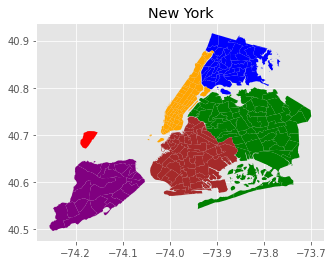

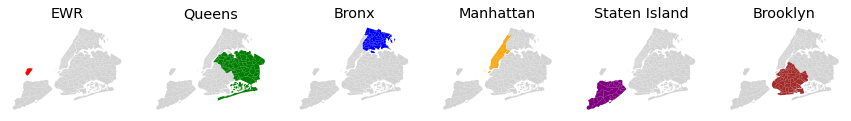

In [15]:
fig, ax = plt.subplots(1, 1)
EWR_zones.plot(ax=ax, color="red", legend=True, label="EWR_zones")
Queens_zones.plot(ax=ax, color="green", legend=True, label="Queens_zones")
Bronx_zones.plot(ax=ax, color="blue", legend=True, label="Bronx_zones")
Manhattan_zones.plot(ax=ax, color="orange", legend=True, label="Manhattan_zones")
Staten_Island_zones.plot(ax=ax, color="purple", legend=True, label="Staten_Island_zones")
Brooklyn_zones.plot(ax=ax, color="brown", legend=True, label="Brooklyn_zones")
ax.set_title('New York')
plt.show()

fig, axs = plt.subplots(1, 6,figsize=(15, 5))
all_zones.plot(ax=axs[0],color="lightgray")
all_zones.plot(ax=axs[1],color="lightgray")
all_zones.plot(ax=axs[2],color="lightgray")
all_zones.plot(ax=axs[3],color="lightgray")
all_zones.plot(ax=axs[4],color="lightgray")
all_zones.plot(ax=axs[5],color="lightgray")
EWR_zones.plot(ax=axs[0], color="red", legend=True, label="EWR_zones")
Queens_zones.plot(ax=axs[1], color="green", legend=True, label="Queens_zones")
Bronx_zones.plot(ax=axs[2], color="blue", legend=True, label="Bronx_zones")
Manhattan_zones.plot(ax=axs[3], color="orange", legend=True, label="Manhattan_zones")
Staten_Island_zones.plot(ax=axs[4], color="purple", legend=True, label="Staten_Island_zones")
Brooklyn_zones.plot(ax=axs[5], color="brown", legend=True, label="Brooklyn_zones")

axs[0].set_title('EWR')
axs[0].set_axis_off()
axs[1].set_title('Queens')
axs[1].set_axis_off()
axs[2].set_title('Bronx')
axs[2].set_axis_off()
axs[3].set_title('Manhattan')
axs[3].set_axis_off()
axs[4].set_title('Staten Island')
axs[4].set_axis_off()
axs[5].set_title('Brooklyn')
axs[5].set_axis_off()

<h4><font color="green">FUNCKIJA - za pribavljanje zona kupljenja i ostavljanja jedne voznje</font></h4>
<hr>

In [16]:
def get_pickup_and_dropoff_geometries_for_drive(drive):
    pickupID = drive["PULocationID"].item()
    dropoffID = drive["DOLocationID"].item()
    pickupGeom = all_zones['geometry'][(all_zones['LocationID']==pickupID)]
    dropoffGeom = all_zones['geometry'][(all_zones['LocationID']==dropoffID)]
    return pickupGeom,dropoffGeom

<hr>

<h4><font color="green">FUNCKIJA - za plot cijelog Njujorka i zona kupljenja i ostavljanja</font></h4>
<hr>

In [17]:
def plot_new_york_with_po_do_zones(pickupGeom, dropoffGeom):
    fig, ax = plt.subplots(1, 1,figsize=(10, 10))
    all_zones.plot(ax=ax, color="lightgray")
    pickupGeom.plot(ax=ax, color="red")
    dropoffGeom.plot(ax=ax, color="blue")


<hr>

<h4><font color="green">FUNCKIJA - za plot odredjene opstine i zona kupljenja i ostavljanja</font></h4>
<hr>

In [18]:
def plot_boroughs_with_po_do_zones(boroughs, pickupGeom, dropoffGeom):
    fig, ax = plt.subplots(1, 1,figsize=(10, 10))
    for borough in boroughs:
        borough.plot(ax=ax, color="lightgray")
    pickupGeom.plot(ax=ax, color="red")
    dropoffGeom.plot(ax=ax, color="blue")


<hr>

### Ubacivanje PU_zone, PU_borough, DO_zone, DO_borough za svaku voznju

In [19]:
taxi_zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geom
0,1,0.116357,0.000782,Newark Airport,1,EWR,MULTIPOLYGON (((-74.18445299999996 40.69499599...
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,MULTIPOLYGON (((-73.82337597260663 40.63898704...
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,MULTIPOLYGON (((-73.84792614099985 40.87134223...
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,MULTIPOLYGON (((-73.97177410965318 40.72582128...
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,MULTIPOLYGON (((-74.17421738099989 40.56256808...


In [20]:
taxi_data = pd.merge(taxi_data, taxi_zones, left_on='PULocationID', right_on='LocationID').drop(
    columns=['LocationID', 'geom', 'Shape_Area', 'Shape_Leng', 'OBJECTID'])
taxi_data.rename(columns = {'zone':'PU_zone','borough':'PU_borough'}, inplace = True)

taxi_data = pd.merge(taxi_data, taxi_zones, left_on='DOLocationID', right_on='LocationID').drop(
    columns=['LocationID', 'geom', 'Shape_Area', 'Shape_Leng', 'OBJECTID'])
taxi_data.rename(columns = {'zone':'DO_zone','borough':'DO_borough'}, inplace = True)


In [21]:
taxi_data.isnull().sum()

VendorID           0
passenger_count    0
trip_distance      0
RatecodeID         0
PULocationID       0
DOLocationID       0
payment_type       0
fare_amount        0
pickup_date        0
pickup_time        0
dropoff_date       0
dropoff_time       0
week_day           0
day_type           0
day_time_slot      0
duration           0
avg_speed          0
PU_zone            0
PU_borough         0
DO_zone            0
DO_borough         0
dtype: int64

## Analiza

### Generalna analiza

#### Voznja koja je najduze trajala

In [22]:
longest_ride = taxi_data.loc[taxi_data["duration"]==taxi_data["duration"].values.max()]

In [23]:
longest_ride

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,pickup_date,pickup_time,...,dropoff_time,week_day,day_type,day_time_slot,duration,avg_speed,PU_zone,PU_borough,DO_zone,DO_borough
9280096,1,1,48.5918,2,132,13,1,52.0,2016-05-24,05:27:36,...,13:45:11,1,1.0,1,497.583333,5.859336,JFK Airport,Queens,Battery Park City,Manhattan


In [24]:
longest_PU, longest_DO = get_pickup_and_dropoff_geometries_for_drive(longest_ride)

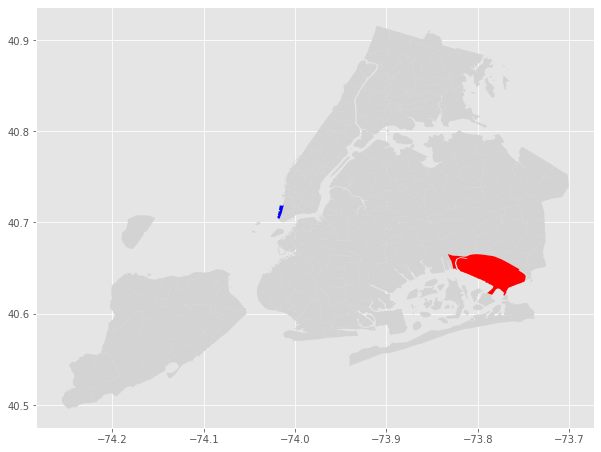

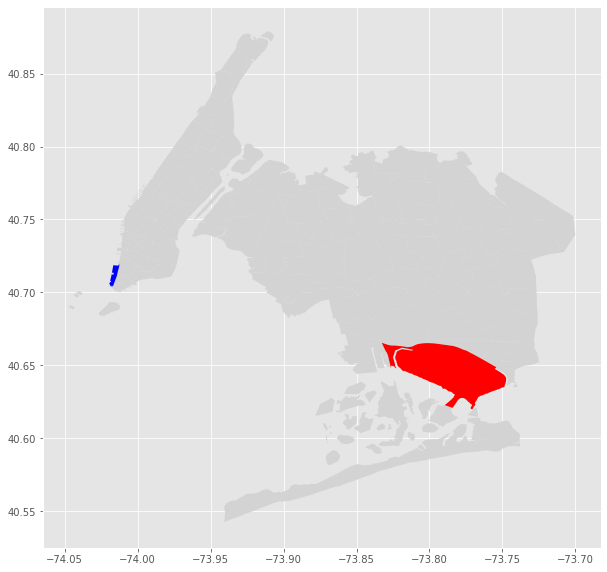

In [25]:
plot_new_york_with_po_do_zones(longest_PU, longest_DO)
plot_boroughs_with_po_do_zones([Manhattan_zones, Queens_zones],longest_PU, longest_DO)


#### Voznja koja je najdalja

In [26]:
farthest_ride = taxi_data.loc[taxi_data["trip_distance"]==taxi_data["trip_distance"].values.max()]

In [27]:
farthest_ride

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,pickup_date,pickup_time,...,dropoff_time,week_day,day_type,day_time_slot,duration,avg_speed,PU_zone,PU_borough,DO_zone,DO_borough
2415307,2,1,147.46485,2,132,230,1,52.0,2016-05-24,21:12:28,...,00:11:14,1,1.0,5,178.766667,49.494076,JFK Airport,Queens,Times Sq/Theatre District,Manhattan


In [28]:
farthest_PU,farthest_DO = get_pickup_and_dropoff_geometries_for_drive(farthest_ride)

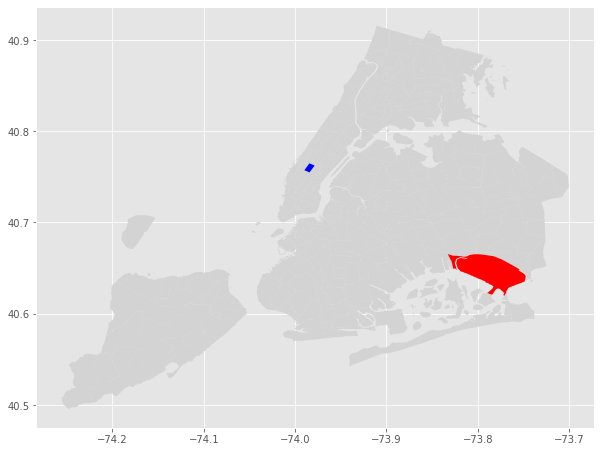

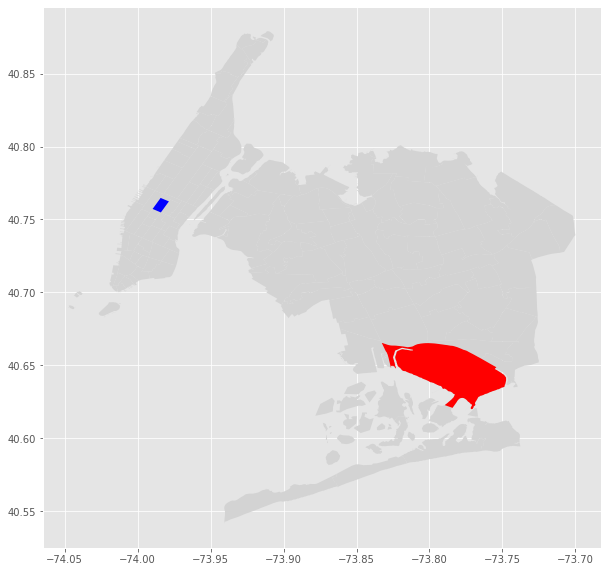

In [29]:
plot_new_york_with_po_do_zones(farthest_PU, farthest_DO)
plot_boroughs_with_po_do_zones([Manhattan_zones,Queens_zones],farthest_PU, farthest_DO)


##### Poredjenje voznje koja je najdalja i najduza

In [30]:
print(pd.concat([longest_ride, farthest_ride]).set_index([pd.Index(["longest_ride","farthest_ride"])]).T)

                      longest_ride              farthest_ride
VendorID                         1                          2
passenger_count                  1                          1
trip_distance              48.5918                  147.46485
RatecodeID                       2                          2
PULocationID                   132                        132
DOLocationID                    13                        230
payment_type                     1                          1
fare_amount                   52.0                       52.0
pickup_date             2016-05-24                 2016-05-24
pickup_time               05:27:36                   21:12:28
dropoff_date            2016-05-24                 2016-05-25
dropoff_time              13:45:11                   00:11:14
week_day                         1                          1
day_type                       1.0                        1.0
day_time_slot                    1                          5
duration

##### Moze se primjetiti da su obe voznje obavljene od Queens do Manhattan i to do zona koje su relativno blizu.
Iz toga bi se trebalo zakljuciti da mozda nisu podaci dobri, ali treba uracunati dodatne faktore.<br>
**Najduza(vremenski) voznja** se odvijala ujutru rano, i na osnovu gore podataka, vjerovatno se desio neki zastoj ili neki radovi u gradu pa da je toliko mala prosjecna brzina kretanja vozila i da je toliko dugo trebalo vremena.<br>
**Najdalja(predjeni put) voznja** se odvijala navece nekada oko ponoci i kada se vidi da je predjeni put ~150km, mora da je putnik zahtjevao da se vozi odredjenom rutom, posto svaka direktna ruta(na google mapama) nije duza od 50km. Takodje posto se odvijala oko ponoci voznja, vjerovatno je mnogo manja guzva u gradu.<br>
<br>
Obe voznje su placene 52\\$, jer sve voznje od/do JFK aerodroma do/od bilo kog dijela u grada se placa 52\\$ (bar u 2016. godini)

### Voznje iz jedne u drugu opstinu

In [31]:
different_boroughs_drive_count = taxi_data["VendorID"][taxi_data["PU_borough"]!=taxi_data["DO_borough"]].count()
all_drives = taxi_data["VendorID"].count()
print("Procenat voznji gdje se putnici prevozi iz jedne u drugu opstinu:" ,different_boroughs_drive_count/all_drives)

Procenat voznji gdje se putnici prevozi iz jedne u drugu opstinu: 0.13259287823003532


#### Grupisanje voznji po opstini

In [32]:
different_boroughs_drive = taxi_data.loc[taxi_data["PU_borough"]!=taxi_data["DO_borough"]]

In [33]:
PU_group=different_boroughs_drive.groupby(['PU_borough']).count()
DO_group=different_boroughs_drive.groupby(['DO_borough']).count()

In [34]:
PU_group["Dropoff_Count"] = DO_group['VendorID']
PU_group["Pickup_Count"] = PU_group["VendorID"]
PU_group.loc[:,["Pickup_Count",'Dropoff_Count']]

,Pickup_Count,Dropoff_Count
PU_borough,,
Bronx,3780,70986
Brooklyn,76604,490775
EWR,13,22942
Manhattan,914080,475625
Queens,520517,452227
Staten Island,17,2456


Takodje se vidi da od svih voznji iz jedne u drugu opstinu, vecinom se pokupe putnici u Manhattan-u i Queens-u, dok se ostavljaju u Brooklyn-u, Manhattan-u i Queens-u

#### Grupisanje voznji po zoni

In [35]:
PU_group_zones=different_boroughs_drive.groupby(['PU_zone'], as_index=False).size()
DO_group_zones=different_boroughs_drive.groupby(['DO_zone'], as_index=False).size()

In [36]:
PU_group_zones['size'].max()

265898

In [37]:
DO_group_zones['size'].max()

146142

In [38]:
DO_group_zones

,DO_zone,size
0,Allerton/Pelham Gardens,612
1,Alphabet City,2962
2,Arden Heights,62
3,Arrochar/Fort Wadsworth,206
4,Astoria,38984
...,...,...
253,Woodlawn/Wakefield,1385
254,Woodside,8778
255,World Trade Center,5381
256,Yorkville East,6811


Primjecuje se da od svih voznji, najvise puta su putnici pokupljeni kod LaGuardia Airport i takodje najvise su putnici odvezeni do LaGuardia Airport i posto ima uslov da su voznje obavljene iz jedne u drugu opstinu, to znaci da je svaka ova voznja posebna voznja.

<h4><font color="green">FUNCKIJA - za plot zastupljenosti voznji po zonama</font></h4>
<hr>

In [39]:
def plot_trip_pu_do_counts_per_zone(background_zones,pu_zone, do_zone):
    fig, axs = plt.subplots(ncols=2, figsize=(20, 10))
    fig.subplots_adjust(bottom=0.1, top=0.9, left=0.09, right=0.8, wspace=0.02, hspace=0.02)
    for zone in background_zones:
        zone.plot(ax=axs[0], color="gray")
        zone.plot(ax=axs[1], color="gray")
    vmin, vmax = pu_zone['size'].min(), pu_zone['size'].max()
    axs[0] = pu_zone.plot(column='size', linewidth=0.09, figsize=(10, 10), 
        norm=colors.LogNorm(vmin=vmin, vmax=vmax), cmap='Blues', legend=False, ax=axs[0]) 
    ctx.add_basemap(axs[0])
    vmin, vmax = do_zone['size'].min(), do_zone['size'].max()
    axs[1] = do_zone.plot(column='size', linewidth=0.1, figsize=(10, 10), 
        norm=colors.LogNorm(vmin=vmin, vmax=vmax), cmap='Blues', legend=False, ax=axs[1])
    ctx.add_basemap(axs[1])
    axs[0].set_title('Pickup')
    axs[1].set_title('Dropoff')
    axs[0].set_axis_off()
    axs[1].set_axis_off()

    patch_col = axs[0].collections[-1]
    cb = fig.colorbar(patch_col, ax=axs, shrink=0.72, orientation="vertical", pad=0.005)
    cb.ax.set_ylabel('Trip Count')
    plt.show()

<hr>

In [40]:
pu_zone = gpd.GeoDataFrame(pd.merge(PU_group_zones, all_zones, left_on='PU_zone', right_on='zone')).drop('zone', axis=1)
do_zone = gpd.GeoDataFrame(pd.merge(DO_group_zones, all_zones, left_on='DO_zone', right_on='zone')).drop('zone', axis=1)

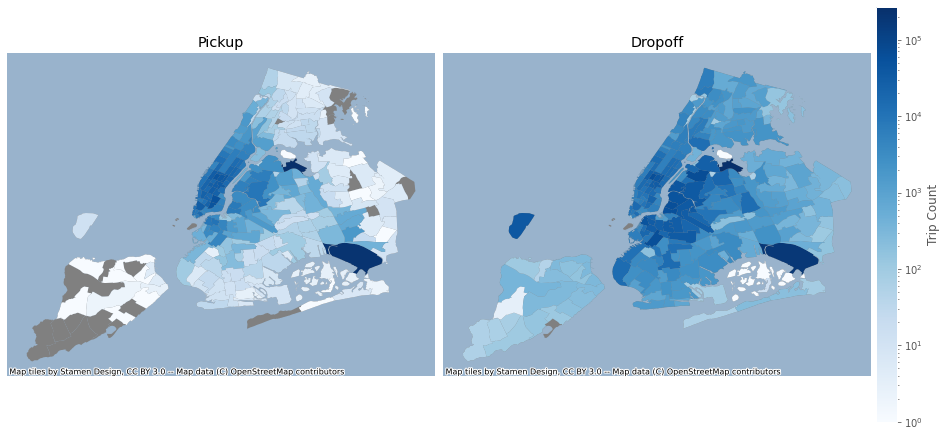

In [41]:
plot_trip_pu_do_counts_per_zone([all_zones],pu_zone,do_zone)

Takodje se i na ovoj slici vidi, da je vecina voznji vezano za LaGuardia Airport i JFK Airport. Pogotovo u Pickup slici.

### Voznje u istoj opstini (PU_borough==DO_borough)

#### Broj voznji po opstini

In [42]:
same_boroughs_drive = taxi_data.loc[taxi_data["PU_borough"]==taxi_data["DO_borough"]]
same_boroughs_drive_count = same_boroughs_drive["VendorID"].count()

In [43]:
same_boroughs_drive_count

9911025

In [44]:
group_boroughs=same_boroughs_drive.groupby(['PU_borough'], as_index=False).size()

In [45]:
group_boroughs

,PU_borough,size
0,Bronx,5318
1,Brooklyn,150323
2,EWR,66
3,Manhattan,9578875
4,Queens,175813
5,Staten Island,630


Moze se primjetiti da se preko 95% voznji koje se odvijaju u istoj opstini, odvijaju u Menhetnu
##### Razlog za to je sto Yellow Cab Taxi vrsi usluge na nivou svih opstina u Njujorku, ali su najzastupljeniji u Menhetnu. Zbog toga vecina ostalih taksi sluzbi vrse usluge u svim opstinama OSIM Menhetna

### Voznje u Menhetnu

In [46]:
manhattan_drives = taxi_data.loc[(taxi_data["PU_borough"]==taxi_data["DO_borough"])&(taxi_data["PU_borough"]=="Manhattan")]

#### Grupisanje po zonama

In [47]:
PU_group_zones=manhattan_drives.groupby(['PU_zone'], as_index=False).size()
DO_group_zones=manhattan_drives.groupby(['DO_zone'], as_index=False).size()

In [48]:
pu_zone = gpd.GeoDataFrame(pd.merge(PU_group_zones, all_zones, left_on='PU_zone', right_on='zone')).drop('zone', axis=1)
do_zone = gpd.GeoDataFrame(pd.merge(DO_group_zones, all_zones, left_on='DO_zone', right_on='zone')).drop('zone', axis=1)

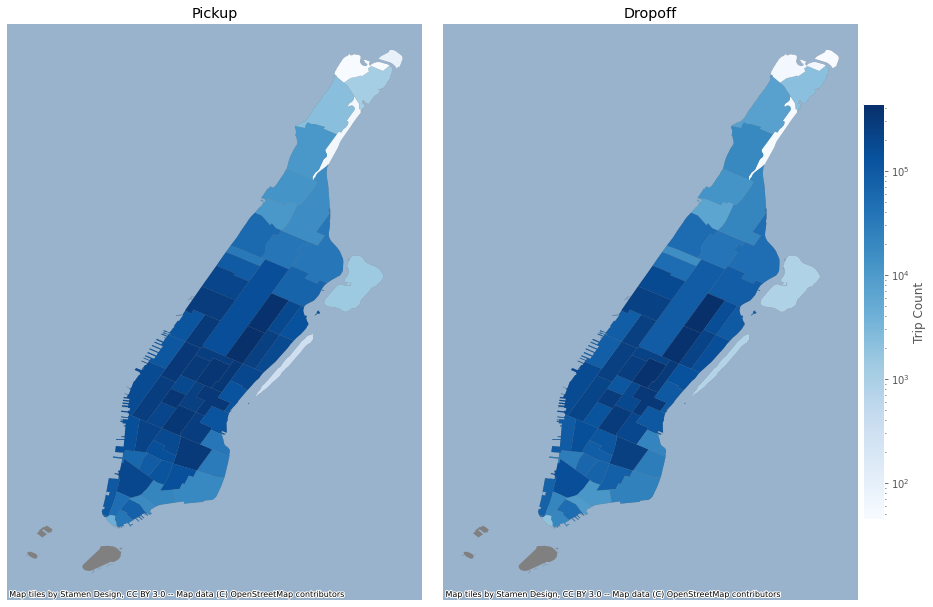

In [49]:
plot_trip_pu_do_counts_per_zone([Manhattan_zones],pu_zone,do_zone)

Vidi se da su ove slike skoro identicne, tj. da je u istom broju zastupljeno i kupljenje i ostavljanje putnika.

#### Voznja koja je najduze trajala

In [50]:
longest_ride = manhattan_drives.loc[manhattan_drives["duration"]==manhattan_drives["duration"].values.max()]

In [51]:
longest_ride

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,pickup_date,pickup_time,...,dropoff_time,week_day,day_type,day_time_slot,duration,avg_speed,PU_zone,PU_borough,DO_zone,DO_borough
2984151,2,1,127.81896,2,48,75,1,52.0,2016-05-31,11:48:30,...,17:48:46,1,1.0,2,360.266667,21.287392,Clinton East,Manhattan,East Harlem South,Manhattan


In [52]:
longest_PU, longest_DO = get_pickup_and_dropoff_geometries_for_drive(longest_ride)

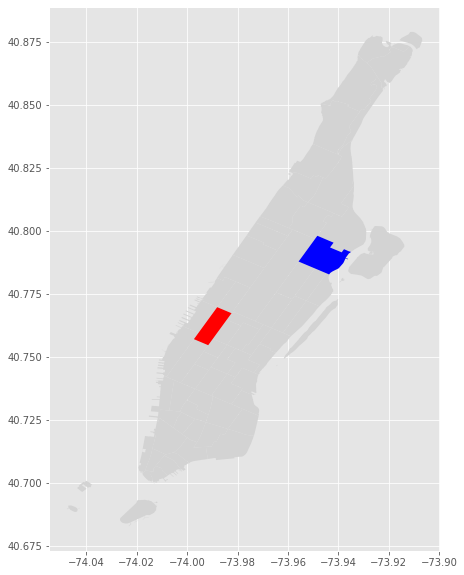

In [53]:
plot_boroughs_with_po_do_zones([Manhattan_zones],longest_PU, longest_DO)

#### Voznja koja je najdalja

In [54]:
farthest_ride = manhattan_drives.loc[manhattan_drives["trip_distance"]==manhattan_drives["trip_distance"].values.max()]

In [55]:
farthest_ride

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,pickup_date,pickup_time,...,dropoff_time,week_day,day_type,day_time_slot,duration,avg_speed,PU_zone,PU_borough,DO_zone,DO_borough
2984151,2,1,127.81896,2,48,75,1,52.0,2016-05-31,11:48:30,...,17:48:46,1,1.0,2,360.266667,21.287392,Clinton East,Manhattan,East Harlem South,Manhattan


In [56]:
farthest_PU,farthest_DO = get_pickup_and_dropoff_geometries_for_drive(farthest_ride)

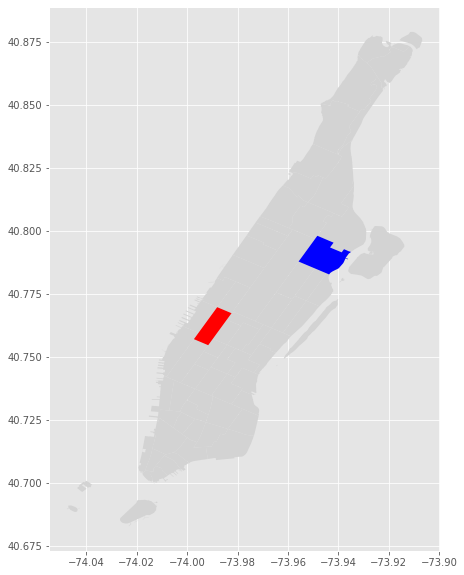

In [57]:
plot_boroughs_with_po_do_zones([Manhattan_zones],farthest_PU, farthest_DO)


##### Poredjenje voznje koja je najdalja i najduza

In [58]:
print(pd.concat([longest_ride, farthest_ride]).set_index([pd.Index(["longest_ride","farthest_ride"])]).T)

                      longest_ride      farthest_ride
VendorID                         2                  2
passenger_count                  1                  1
trip_distance            127.81896          127.81896
RatecodeID                       2                  2
PULocationID                    48                 48
DOLocationID                    75                 75
payment_type                     1                  1
fare_amount                   52.0               52.0
pickup_date             2016-05-31         2016-05-31
pickup_time               11:48:30           11:48:30
dropoff_date            2016-05-31         2016-05-31
dropoff_time              17:48:46           17:48:46
week_day                         1                  1
day_type                       1.0                1.0
day_time_slot                    2                  2
duration                360.266667         360.266667
avg_speed                21.287392          21.287392
PU_zone               Clinto

Vidi se da su i najdalja i najduza voznja, jedan te ista voznja iz jedne u drugu zonu unutar Menhetna. Posto Menhetn sam po sebi nije velika opsina, predjenih 127km znaci zapravo da putnik nije direktno iz jedne u drugu zonu isao, nego je vjerovatno naveo vozacu odredjenom rutom da vozi.

### Voznje koje se odvijaju u istoj zoni u Menhetnu

In [59]:
same_zone_rides = manhattan_drives[manhattan_drives["PULocationID"]==manhattan_drives["DOLocationID"]]

In [60]:
group_manhattan_zones=same_zone_rides.groupby(['PU_zone'], as_index=False).size()

In [61]:
pu_zone = gpd.GeoDataFrame(pd.merge(group_manhattan_zones, all_zones, left_on='PU_zone', right_on='zone')).drop('zone', axis=1)

In [62]:
pu_zone

,PU_zone,size,geometry,LocationID
0,Alphabet City,817,"POLYGON ((-73.97177 40.72582, -73.97179 40.725...",4
1,Battery Park,17,"POLYGON ((-74.01566 40.70483, -74.01540 40.704...",12
2,Battery Park City,3274,"POLYGON ((-74.01244 40.71906, -74.01282 40.717...",13
3,Bloomingdale,616,"POLYGON ((-73.95954 40.79872, -73.96004 40.798...",24
4,Central Harlem,3977,"POLYGON ((-73.94774 40.80960, -73.94506 40.808...",41
...,...,...,...,...
61,West Chelsea/Hudson Yards,7653,"POLYGON ((-74.00440 40.76267, -74.00220 40.761...",246
62,West Village,8214,"POLYGON ((-74.00251 40.72902, -74.00282 40.728...",249
63,World Trade Center,916,"POLYGON ((-74.01333 40.70503, -74.01327 40.704...",261
64,Yorkville East,4928,"MULTIPOLYGON (((-73.94383 40.78286, -73.94376 ...",262


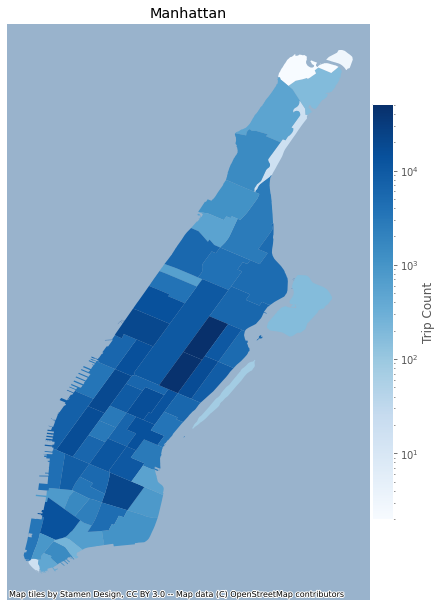

In [63]:
fig, ax = plt.subplots(1, 1,figsize=(10, 10))
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.09, right=0.8, wspace=0.02, hspace=0.02)

vmin, vmax = pu_zone['size'].min(), pu_zone['size'].max()
ax = pu_zone.plot(column='size', linewidth=0.09, figsize=(10, 10), 
    norm=colors.LogNorm(vmin=vmin, vmax=vmax), cmap='Blues', legend=False, ax=ax) 
ctx.add_basemap(ax)
ax.set_title('Manhattan')
ax.set_axis_off()

patch_col = ax.collections[0]
cb = fig.colorbar(patch_col, ax=ax, shrink=0.72, orientation="vertical", pad=0.005)
cb.ax.set_ylabel('Trip Count')
plt.show()

#### Voznja koja je najduze trajala

In [64]:
longest_ride = same_zone_rides.loc[same_zone_rides["duration"]==same_zone_rides["duration"].values.max()]

In [65]:
longest_ride

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,pickup_date,pickup_time,...,dropoff_time,week_day,day_type,day_time_slot,duration,avg_speed,PU_zone,PU_borough,DO_zone,DO_borough
3049439,1,1,38.616,1,75,75,1,135.0,2016-05-03,09:09:03,...,12:41:38,1,1.0,2,212.583333,10.899067,East Harlem South,Manhattan,East Harlem South,Manhattan


In [66]:
longest_PU, longest_DO = get_pickup_and_dropoff_geometries_for_drive(longest_ride)

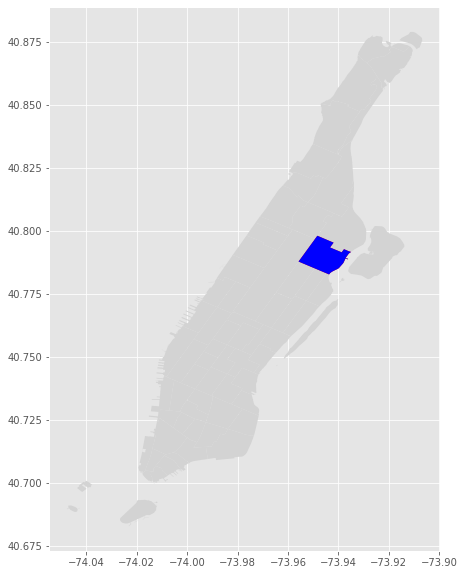

In [67]:
plot_boroughs_with_po_do_zones([Manhattan_zones],longest_PU, longest_DO)


#### Voznja koja je najdalja

In [68]:
farthest_ride = same_zone_rides.loc[same_zone_rides["trip_distance"]==same_zone_rides["trip_distance"].values.max()]

In [69]:
farthest_ride

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,pickup_date,pickup_time,...,dropoff_time,week_day,day_type,day_time_slot,duration,avg_speed,PU_zone,PU_borough,DO_zone,DO_borough
3400419,1,2,92.1957,1,239,239,1,154.0,2016-05-11,09:33:41,...,11:19:51,2,1.0,2,106.166667,52.10432,Upper West Side South,Manhattan,Upper West Side South,Manhattan


In [70]:
farthest_PU,farthest_DO = get_pickup_and_dropoff_geometries_for_drive(farthest_ride)

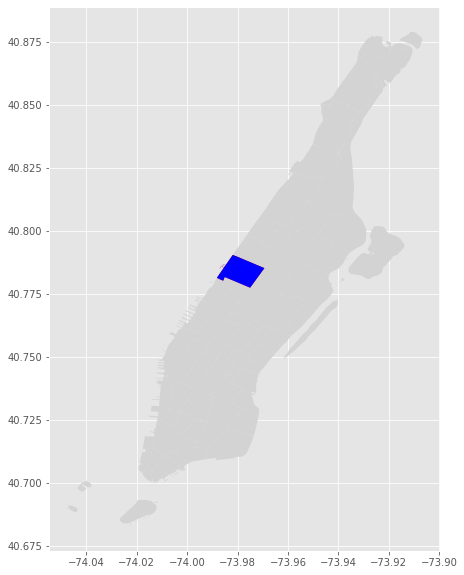

In [71]:
plot_boroughs_with_po_do_zones([Manhattan_zones],farthest_PU, farthest_DO)


##### Poredjenje voznje koja je najdalja i najduza

In [72]:
print(pd.concat([longest_ride, farthest_ride]).set_index([pd.Index(["longest_ride","farthest_ride"])]).T)

                      longest_ride          farthest_ride
VendorID                         1                      1
passenger_count                  1                      2
trip_distance               38.616                92.1957
RatecodeID                       1                      1
PULocationID                    75                    239
DOLocationID                    75                    239
payment_type                     1                      1
fare_amount                  135.0                  154.0
pickup_date             2016-05-03             2016-05-11
pickup_time               09:09:03               09:33:41
dropoff_date            2016-05-03             2016-05-11
dropoff_time              12:41:38               11:19:51
week_day                         1                      2
day_type                       1.0                    1.0
day_time_slot                    2                      2
duration                212.583333             106.166667
avg_speed     

U obe voznje se vidi da je predjeni put (38km i 92km) mnogo veci od same zone gdje se zapocela i zavrsila voznja.
To znaci da je putnik imao odredjenu rutu koja je vjerovatno prolazila kroz ostatak grada i samim tim ostvarenu kilometrazu. <br>
Takodje se vidi iako je jedna voznja veca predjenim putem, druga je duza vremenski.<br>
Sto se tice cijeneza 20$ je skuplja voznja sa vecom kilometrazom, sto zapravo nije velika razlika, jer i u voznji koja je duze trajala su se odbrojavale minute na taksimetru.

### Prosjecna cijena

In [73]:
pu_fare = taxi_data.groupby(['PULocationID'], as_index=False)['fare_amount'].mean()
pu_gdf = gpd.GeoDataFrame(pd.merge(pu_fare, all_zones, left_on='PULocationID', right_on='LocationID')).drop('PULocationID',axis=1)


do_fare = taxi_data.groupby(['DOLocationID'], as_index=False)['fare_amount'].mean()
do_gdf = gpd.GeoDataFrame(pd.merge(do_fare, all_zones, left_on='DOLocationID', right_on='LocationID')).drop('DOLocationID',axis=1)


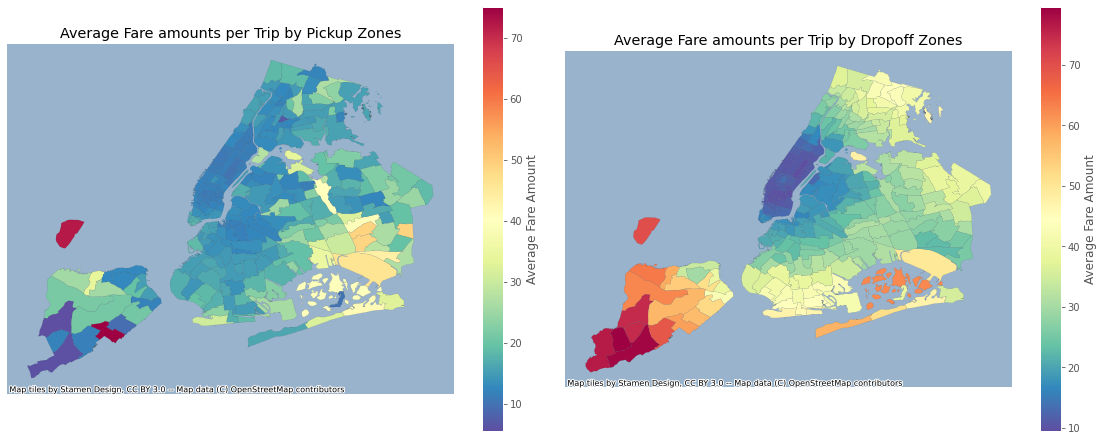

In [74]:
fig, axs = plt.subplots(ncols=2, figsize=(20, 10))
vmin, vmax = pu_gdf['fare_amount'].min(), pu_gdf['fare_amount'].max()
pu_gdf.plot(column='fare_amount', cmap='Spectral_r', linewidth=0.05, ax=axs[0], edgecolor='k',
    legend=True, legend_kwds={'label': "Average Fare Amount", 'shrink': 0.78}, vmin=vmin, vmax=vmax, 
    missing_kwds={"color": "lightgrey", "edgecolor": "red", "hatch": "///", "label": "Missing values"})

vmin, vmax = do_gdf['fare_amount'].min(), do_gdf['fare_amount'].max()
do_gdf.plot(column='fare_amount', cmap='Spectral_r', linewidth=0.05, ax=axs[1], edgecolor='k',
    legend=True, legend_kwds={'label': "Average Fare Amount", 'shrink': 0.78}, vmin=vmin, vmax=vmax,
    missing_kwds={"color": "lightgrey", "edgecolor": "red", "hatch": "///", "label": "Missing values"})

fig.subplots_adjust(wspace=0)
ctx.add_basemap(axs[0])
ctx.add_basemap(axs[1])
axs[0].set_axis_off()
axs[1].set_axis_off()
axs[0].set_title("Average Fare amounts per Trip by Pickup Zones")
axs[1].set_title("Average Fare amounts per Trip by Dropoff Zones")
plt.show()

Ovdje se primjecuje da u zonama koje su izdvojene tj. Staten Island, da su vece cijene voznji, sto i jeste logicno, s tim da su fizicki vise udaljene.